<a href="https://colab.research.google.com/github/EmmanuelADAM/IntelligenceArtificiellePython/blob/master/IntrusionLogiqueFloueToDO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Détection d'intrusion 
Petit exercice simple de création de règles de logique floue pour la détection d'intrusion avec la bibliothèque Python skfuzzy.

Voici les règles Floues
 - Si le nombre de Connexions est Faible et le taux de Paquets Invalides est Bas, alors le niveau de Menace est Faible.
 - Si le nombre de Connexions est Moyen et le taux de Paquets Invalides est Modéré, alors le niveau de Menace est Modéré.
 - Si le nombre de Connexions est Élevé ou le taux de Paquets Invalides est Haut, alors le niveau de Menace est Élevé.


In [2]:
# %pip install -U scikit-fuzzy

In [54]:
#les imports
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl 


## les antécédents et les conséquents
- Les antécédents sont les variables utilisées pour prendre les décisions; ici le nombre de connections, le taux de paquets invalides.
 - le site reçoit en moyenne 50 connections par heure.
- le conséquent est le niveau de menace

In [55]:
#### Antecedent et Consequent
nombre_connexions = ctrl.Antecedent(np.arange(0, 200, 1), 'nombre_connexions')
taux_paquets_invalides = ctrl.Antecedent(np.arange(0, 101, 1), 'taux_paquets_invalides')
niveau_menace = ctrl.Consequent(np.arange(0, 101, 1), 'niveau_menace')

In [56]:
nombre_connexions


Antecedent: nombre_connexions

### ensembles flous
on définit ensuite les intervales utilisés dans les antécédents et les conséquents.
#### Le nombre de connexions
- ce nombre est faible de 0 à 25, moyen à 50 et élevé à partir de 100 par heure pour les habitudes de ce site


In [ ]:
#une courbe sigmoide, nombre_connexions à moitié faible à 25
#TODO : compléter le code
# nombre_connexions['faible'] =
#une courbe en cloche, nombre_connexions commmence à être  moyenne à 25, parfaitement moyenn à 50 pour décroitre et ne l'être plus à 75
# nombre_connexions['moyen'] = 
#une courbe sigmoide, nombre_connexions eleve à partir de 100
# nombre_connexions['élevé'] =

In [58]:
nombre_connexions.terms.values()

odict_values([nombre_connexions[faible], nombre_connexions[moyen], nombre_connexions[élevé]])

On peut vérifier les courbes d'appartenance : 
- *ici les courbes sont trapézoidales, mais vous pouvez les définir autrement*

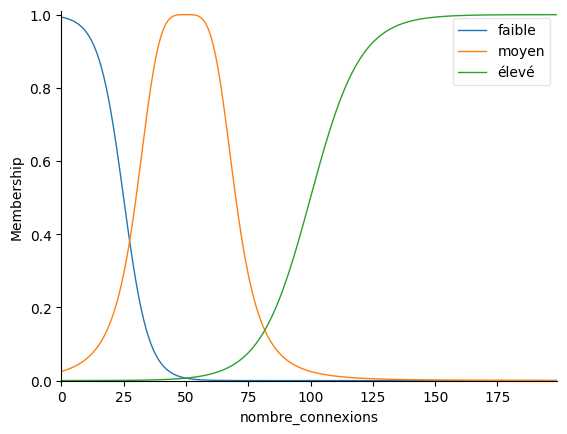

In [59]:
nombre_connexions.view()


#### Le taux de paquets invalides


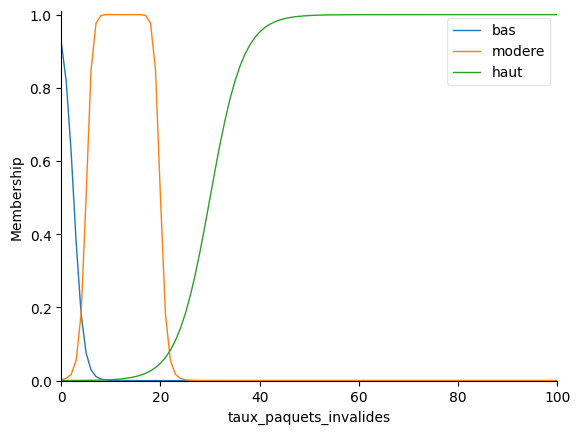

In [ ]:
#taux bas <= 5, taux modéré entre 5 et 20, taux haut >= 20
#TODO : compléter le code
#taux_paquets_invalides['bas'] =  
#taux_paquets_invalides['modere'] =
#taux_paquets_invalides['haut'] =  
#taux_paquets_invalides.view()

#### Le niveau_menace


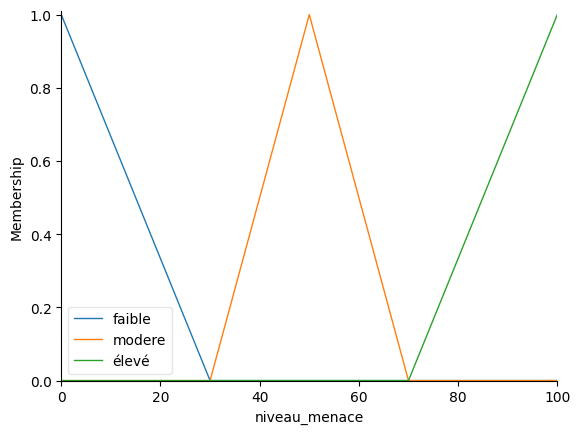

In [ ]:
#pour chan ger, on utilise ici des triangles
#TODO : compléter le code
#niveau_menace['faible'] = 
#niveau_menace['modere'] =  
#niveau_menace['élevé'] =  
#niveau_menace.view()

## Définition des règles floues
Rappel, on souhaite définir : 
 - Si le nombre de Connexions est Faible et le taux de Paquets Invalides est Bas, alors le niveau de Menace est Faible.
 - Si le nombre de Connexions est Moyen et le taux de Paquets Invalides est Modéré, alors le niveau de Menace est Modéré.
 - Si le nombre de Connexions est Élevé ou le taux de Paquets Invalides est Haut, alors le niveau de Menace est Élevé.

In [ ]:
# Définir les règles floues
#rule1 =
#rule2 =
#rule3 =


In [63]:
#on compile les règles
intrusions_regles = ctrl.ControlSystem([rule1, rule2, rule3 ])
intrusion_decision = ctrl.ControlSystemSimulation(intrusions_regles)

## Observations
Testons le système : 
- un taux de connection de 10/h, mais 70% de mauvais paquets

In [64]:
intrusion_decision.input['nombre_connexions'] = 10
intrusion_decision.input['taux_paquets_invalides'] = 5

intrusion_decision.compute()

print(intrusion_decision.input)
taux_menace_predit = intrusion_decision.output['niveau_menace']
print(f'-> taux de menace  {taux_menace_predit:.1f} %')

nombre_connexions : 10
taux_paquets_invalides : 5

-> taux de menace  32.8 %


la durée est < 1, ce qui correspond à une durée nulle.

Vérifions en image :

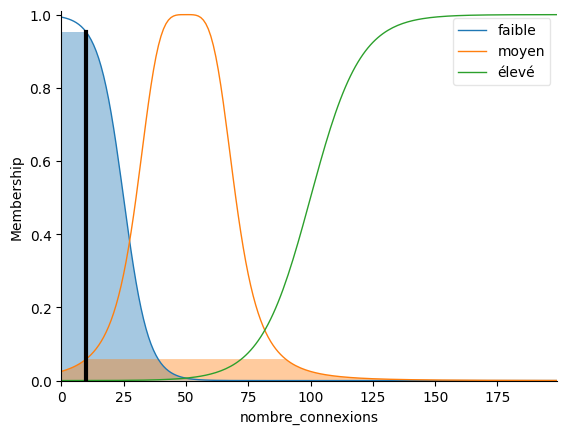

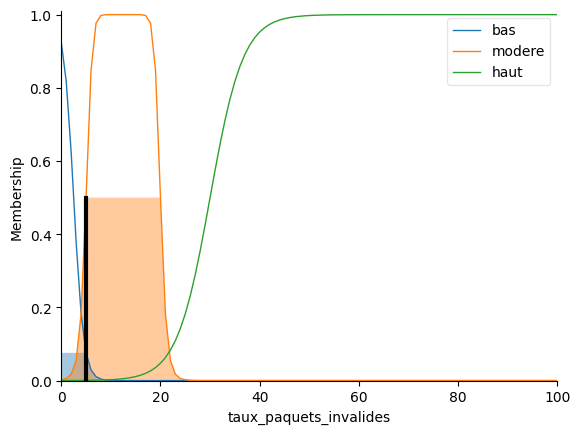

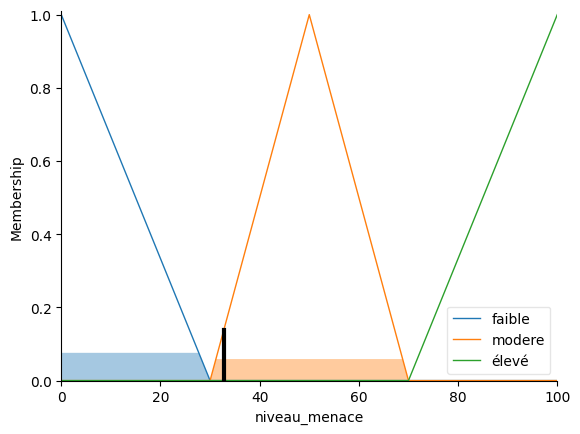

In [65]:
nombre_connexions.view(sim=intrusion_decision)
taux_paquets_invalides.view(sim=intrusion_decision)
niveau_menace.view(sim=intrusion_decision)
